In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

#Task1
#Bank Marketing Data Set has been chosen
#The data is related with direct marketing campaigns of a Portuguese banking institution
#Read the data
df = pd.read_csv('bank-additional-full.csv' , warn_bad_lines = True, na_values = ['n/a', '\s+', "N/A"])

print(df.head(5))
#data frames are equivalent to the raw data

#printing the dimensions and information of dataframe columns
print(df.shape)
print(df.info())

#Dataset has more than 150 rows and has 21 columns
#The class label column is whether client will subscribe (yes/no) a term deposit (variable y), so clearly it is not multilabel
#Apart from the class label, there are 10 categorical columns

#Checking the missing values
print(df.isnull().any())#Checking columns with null values

#There are no missing values present 

print(df.describe(include = [np.number]))#Summary statistics of numerical data
print(df.describe(include = [np.object]))#Summary statistics of categorical data

#As per the summary statistics, it can be seen that there are no impossible values,data entry errors, extra whitespaces
#But there are some unknown values in the dataset so need to check whether that can be removed
print(df["job"].value_counts())#checking the number of counts for each job type value

#Since small number of unknown jobs are there, so dropping rows with unknown jobs
df = df[df.job!= 'unknown']
print(df["job"].value_counts())

print(df["marital"].value_counts())#checking the number of counts for each marital status
#Since small number of customers with unknown marital status are there, so dropping rows with unknown marital status
df = df[df.marital!= 'unknown']
print(df["marital"].value_counts())

print(df["education"].value_counts())#checking the number of counts for each education type
#Since small number of customers with unknown education are there, so dropping rows with unknown education
df = df[df.education!= 'unknown']
print(df["education"].value_counts())

print(df["default"].value_counts())#checking the number of counts for each default credit type
#Since the number of unknown values are quite high so it is better to not delete the unknown values, so we are going to keep it

print(df["housing"].value_counts())#checking the number of counts for each value in housing loan
#Since small number of unknown housing loan values are there, so dropping rows with unknown housing loan values
df = df[df.housing!= 'unknown']
print(df["housing"].value_counts())

print(df["loan"].value_counts())#checking the number of counts for each value in personal loan
#There are no unknown values in personal loan column

print(df.duplicated().sum())#Number of duplicate rows

print(df[df.duplicated(keep = "first") == True])
print(df[df.duplicated(keep = "last") == True])

df.drop_duplicates(inplace = True)#dropping the duplicate rows
print(df.duplicated().sum())

print(df.shape)#Check the dimensions in order to check whether duplicate rows have been dropped

print(df.describe(include = [np.object]))#Validating final Values
#Data has now been cleaned

#Data Transformation
bins = [0, 24, 40, 55, 100]
labels = ['<25' , '25-40', '40-55', '55+']
df['binned'] = pd.cut(df['age'], bins, labels=labels)
print(df.head(5))


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...

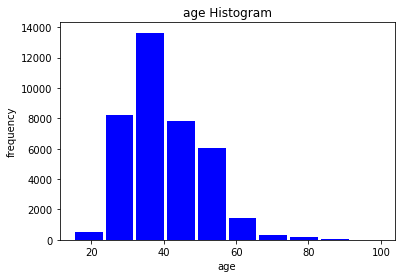

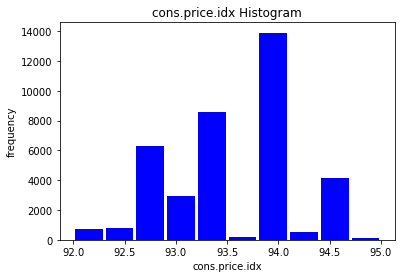

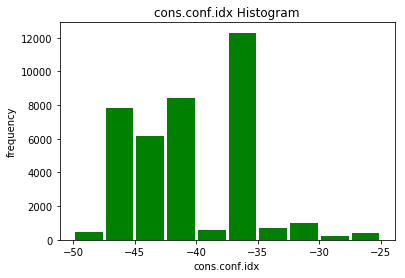

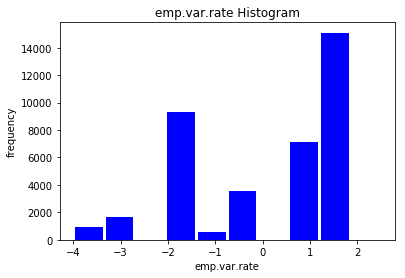

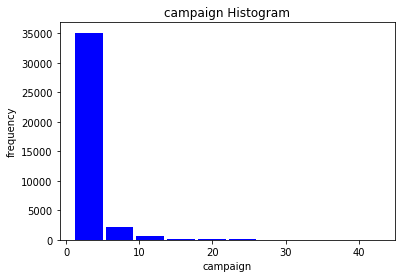

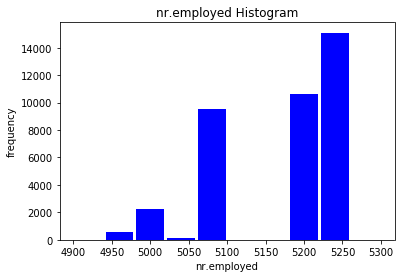

           job  marital          education default housing   loan   contact  \
count    38234    38234              38234   38234   38234  38234     38234   
unique      11        3                  7       3       2      2         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq      9934    23177              11817   30475   20573  32275     24432   

        month day_of_week     poutcome      y  
count   38234       38234        38234  38234  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    12792        8007        33055  33977  
university.degree      11817
high.school             9241
basic.9y                5856
professional.course     5097
basic.4y                4002
basic.6y                2203
illiterate                18
Name: education, dtype: int64


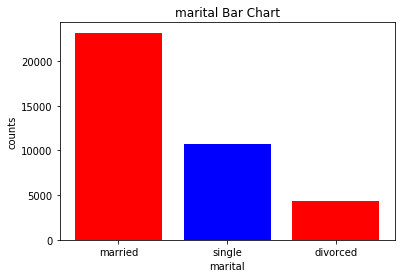

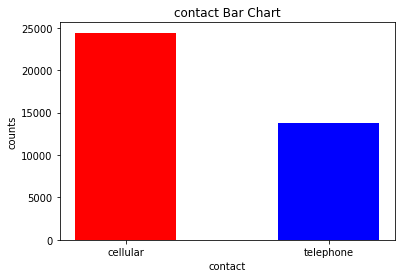

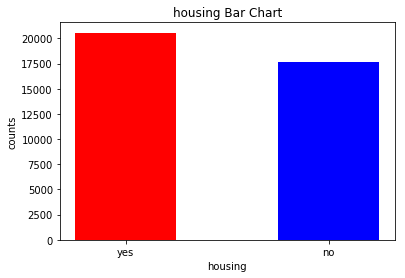

In [2]:
#Task 2.1:Exploring the columns
#Using graphical Visualisations of numerical Columns
#Choosing numerical Column as age and plotting histogram

range = (15, 100)
bins = 10

#Plotting a histogram
plt.hist(df["age"], bins, range, color = 'blue', histtype = 'bar', rwidth = 0.9)

#x-axis label
plt.xlabel("age")

#y-axis label
plt.ylabel("frequency")

#plot title
plt.title("age Histogram")

#Save fig
plt.savefig('age Histogram.png')

#Show the plot
plt.show()

#Choosing numerical Column as cons.price.idx and plotting histogram
range = (92, 95)
bins = 10

#Plotting a histogram
plt.hist(df["cons.price.idx"], bins, range, color = 'blue', histtype = 'bar', rwidth = 0.9)

#x-axis label
plt.xlabel("cons.price.idx")

#y-axis label
plt.ylabel("frequency")

#plot title
plt.title("cons.price.idx Histogram")

#Save fig
plt.savefig('cons.price.idx Histogram.png')

#Show the plot
plt.show()

#Choosing numerical Column as cons.conf.idx and plotting histogram
range = (-50, -25)
bins = 10

#Plotting a histogram
plt.hist(df["cons.conf.idx"], bins, range, color = 'green', histtype = 'bar', rwidth = 0.9)

#x-axis label
plt.xlabel("cons.conf.idx")

#y-axis label
plt.ylabel("frequency")

#plot title
plt.title("cons.conf.idx Histogram")

#Save fig
plt.savefig('cons.conf.idx Histogram.png')

#Show the plot
plt.show()

#Choosing numerical Column as emp.var.rate and plotting histogram
range = (-4, 2.5)
bins = 10

#Plotting a histogram
plt.hist(df["emp.var.rate"], bins, range, color = 'blue', histtype = 'bar', rwidth = 0.9)

#x-axis label
plt.xlabel("emp.var.rate")

#y-axis label
plt.ylabel("frequency")

#plot title
plt.title("emp.var.rate Histogram")

#Save fig
plt.savefig('emp.var.rate Histogram.png')

#Show the plot
plt.show()

#Choosing numerical Column as campaign and plotting histogram
range = (1, 57)
bins = 10

#Plotting a histogram
plt.hist(df["campaign"], color = 'blue', histtype = 'bar', rwidth = 0.9)

#x-axis label
plt.xlabel("campaign")

#y-axis label
plt.ylabel("frequency")

#plot title
plt.title("campaign Histogram")

#Save fig
plt.savefig('campaign Histogram.png')

#Show the plot
plt.show()

#Choosing numerical Column as nr.employed and plotting histogram
range = (4900, 5300)
bins = 10

#Plotting a histogram
plt.hist(df["nr.employed"], bins, range, color = 'blue', histtype = 'bar', rwidth = 0.9)

#x-axis label
plt.xlabel("nr.employed")

#y-axis label
plt.ylabel("frequency")

#plot title
plt.title("nr.employed Histogram")

#Save fig
plt.savefig('nr.employed Histogram.png')

#Show the plot
plt.show()

#Using Descriptive statistics for categorical Columns
print(df.describe(include = [np.object]))#Summary Statistics

#As observed column education has 8 unique values
print(df["education"].value_counts())#Exploring the count of all the unique values
#It is observed that the university.degree has the highest count and illiterate has the lowest count 

#Using graphical visualisations for categorical Columns
#Choosing categorical Column as marital and plotting Bar Chart

rt = df["marital"].value_counts()

plt.bar(rt.index, rt.values, color=['red', 'blue'])

#x-axis label
plt.xlabel("marital")

#y-axis label
plt.ylabel("counts")

#plot title
plt.title("marital Bar Chart")

#Save fig
plt.savefig('marital Bar Chart.png')

#Show the plot
plt.show()

#Choosing categorical Column as contact and plotting Bar Chart

rt = df["contact"].value_counts()

plt.bar(rt.index, rt.values, width = 0.5, color=['red', 'blue'])

#x-axis label
plt.xlabel("contact")

#y-axis label
plt.ylabel("counts")

#plot title
plt.title("contact Bar Chart")

#Save fig
plt.savefig('contact Bar Chart.png')

#Show the plot
plt.show()

#Choosing categorical Column as housing and plotting Bar Chart

rt = df["housing"].value_counts()

plt.bar(rt.index, rt.values, width = 0.5, color=['red', 'blue'])

#x-axis label
plt.xlabel("housing")

#y-axis label
plt.ylabel("counts")

#plot title
plt.title("housing Bar Chart")

#Save fig
plt.savefig('housing Bar Chart.png')

#Show the plot
plt.show()




y    marital 
no   divorced     3853
     married     20837
     single       9287
yes  divorced      448
     married      2340
     single       1469
Name: marital, dtype: int64


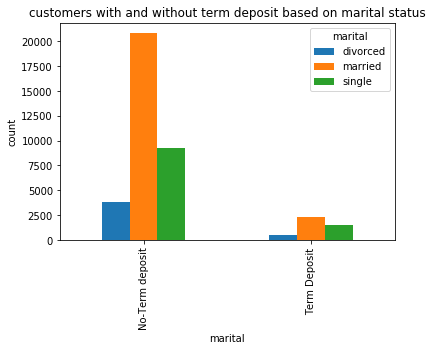

y    housing
no   no         15755
     yes        18222
yes  no          1906
     yes         2351
Name: housing, dtype: int64


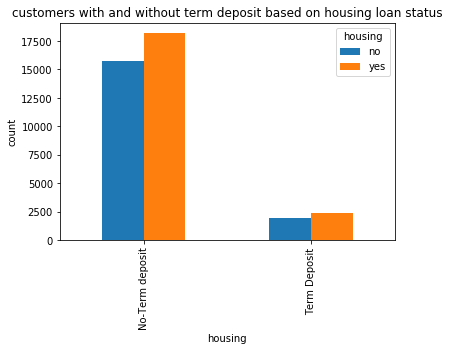

y    poutcome   
no   failure         3403
     nonexistent    30134
     success          440
yes  failure          533
     nonexistent     2921
     success          803
Name: poutcome, dtype: int64


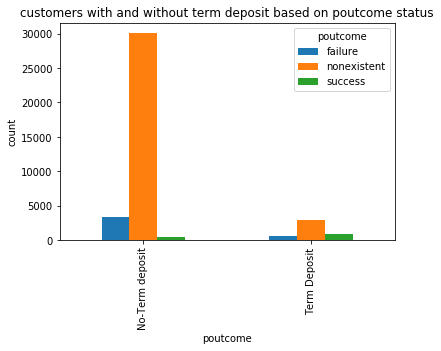

binned  y  
<25     no       726
        yes      204
25-40   no     19121
        yes     2329
40-55   no     11600
        yes     1078
55+     no      2530
        yes      646
Name: y, dtype: int64


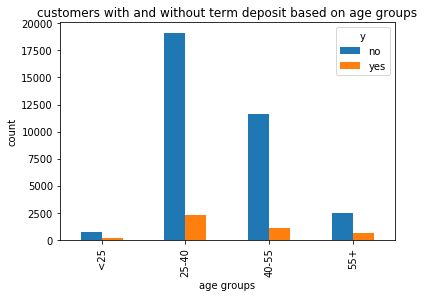

SpearmanrResult(correlation=0.6687444365830539, pvalue=0.0)

In [3]:
#Task 2.2:Exploring the relationships between the columns

#Exploring the relationship between marital status and term deposit variable
cum = df.groupby(['y', 'marital']).marital.count()
print(cum)

cum.unstack().plot(kind='bar', width=0.5)

plt.xticks([0.0, 1.0], ['No-Term deposit', 'Term Deposit'])

#x-axis label
plt.xlabel("marital")

#y-axis label
plt.ylabel("count")

#plot title
plt.title("customers with and without term deposit based on marital status")

#Save fig
plt.savefig('customers with and without term deposit based on marital status.png')

#Show the plot
plt.show()


#Exploring the relationship between housing and term deposit variable
cum1 = df.groupby(['y', 'housing']).housing.count()
print(cum1)

cum1.unstack().plot(kind='bar', width=0.5)

plt.xticks([0.0, 1.0], ['No-Term deposit', 'Term Deposit'])

#x-axis label
plt.xlabel("housing")

#y-axis label
plt.ylabel("count")

#plot title
plt.title("customers with and without term deposit based on housing loan status")

#Save fig
plt.savefig('customers with and without term deposit based on housing.png')

#Show the plot
plt.show()

#Exploring the relationship between poutcome and term deposit variable
cum2 = df.groupby(['y', 'poutcome']).poutcome.count()
print(cum2)

cum2.unstack().plot(kind='bar', width=0.5)

plt.xticks([0.0, 1.0], ['No-Term deposit', 'Term Deposit'])

#x-axis label
plt.xlabel("poutcome")

#y-axis label
plt.ylabel("count")

#plot title
plt.title("customers with and without term deposit based on poutcome status")

#Save fig
plt.savefig('customers with and without term deposit based on poutcome.png')

#Show the plot
plt.show()

#Exploring the Relation between age groups and response
gp = df.groupby(['binned', 'y']).y.count()
print(gp)

gp.unstack().plot(kind='bar')

#x-axis label
plt.xlabel("age groups")

#y-axis label
plt.ylabel("count")

#plot title
plt.title("customers with and without term deposit based on age groups")

#Save fig
plt.savefig('customers with and without term deposit based on age.png')

#Show the plot
plt.show()

#Descriptive statistics
#Exploring the Relation between emp.var.rate and cons.price.idx
scipy.stats.spearmanr(a=df["emp.var.rate"], 
                      b=df["cons.price.idx"], nan_policy='omit')

#Correlations between emp.var.rate and cons.price.idx is statistically significant, since the p-values are very close to zero.


    age           job   marital          education  default housing loan  \
75   41   blue-collar  divorced           basic.4y  unknown     yes   no   
83   49  entrepreneur   married  university.degree  unknown     yes   no   
88   49    technician   married           basic.9y       no      no   no   

      contact month day_of_week  ...  pdays  previous     poutcome  \
75  telephone   may         mon  ...    999         0  nonexistent   
83  telephone   may         mon  ...    999         0  nonexistent   
88  telephone   may         mon  ...    999         0  nonexistent   

    emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  \
75           1.1         93.994          -36.4      4.857       5191.0  yes   
83           1.1         93.994          -36.4      4.857       5191.0  yes   
88           1.1         93.994          -36.4      4.857       5191.0  yes   

    binned  
75   40-55  
83   40-55  
88   40-55  

[3 rows x 22 columns]
education            y

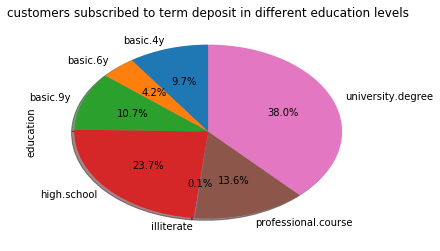

In [4]:
#Task 2.3
#Finding the proportion of education level of customers who have subscribed to the term deposit
gp1 = df.groupby('y')
gp2 = gp1.get_group('yes')
print(gp2.head(3))

cum3 = gp2.groupby(['education', 'y']).education.count()
print(cum3)

activities = ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree']

cum3.plot(kind = 'pie', labels = activities, autopct='%1.1f%%', shadow = True, startangle = 90, title='customers subscribed to term deposit in different education levels')
plt.show()




In [5]:
#Task 3:Data Modelling
#Task 3.1: Splitting the data

df["y"].replace('yes', 1, inplace = True)#Replacing values of target
df["y"].replace('no', 0, inplace = True)

df.drop(['binned'], axis = 1)#Dropping column

#Feature Transformation
#Converting Categorical columns into numerical
df1 = pd.get_dummies(df, drop_first=True)
df1.head(3)
df1.info()
print(df1.shape)

#Splitting the variables into features and target 
X = df1.drop('y', axis=1)
y = df1.y

print(X.shape)#printing dimensions of features
print(y.shape)#printing dimensions of label

print(y[:3])#printing the first 3 rows of label

# Splitting the data into 50% for training and 50% for testing, 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5,random_state=0)
                                                
# Check shapes and confirm the rows 38234*0.5 = 19117
print('Suite1')
print('Training set1')
print(X_train1.shape, y_train1.shape)

# Check shapes and confirm the rows 38234*0.5 = 19117
print('Test set1')
print(X_test1.shape, y_test1.shape)

# Splitting the data into 60% for training and 40% for testing, 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4,random_state=0)
                                                
# Check shapes and confirm the rows 38234*0.6 = 22940
print('Suite2')
print('Training set2')
print(X_train2.shape, y_train2.shape)

# Check shapes and confirm the rows 38234*0.4 = 15294
print('Test set2')
print(X_test2.shape, y_test2.shape)

# Splitting the data into 80% for training and 20% for testing, 
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2,random_state=0)
                                                
# Check shapes and confirm the rows 38234*0.8 = 30587
print('Suite3')
print('Training set3')
print(X_train3.shape, y_train3.shape)

# Check shapes and confirm the rows 38234*0.2 = 7647
print('Test set3')
print(X_test3.shape, y_test3.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38234 entries, 0 to 41187
Data columns (total 52 columns):
age                              38234 non-null int64
duration                         38234 non-null int64
campaign                         38234 non-null int64
pdays                            38234 non-null int64
previous                         38234 non-null int64
emp.var.rate                     38234 non-null float64
cons.price.idx                   38234 non-null float64
cons.conf.idx                    38234 non-null float64
euribor3m                        38234 non-null float64
nr.employed                      38234 non-null float64
y                                38234 non-null int64
job_blue-collar                  38234 non-null uint8
job_entrepreneur                 38234 non-null uint8
job_housemaid                    38234 non-null uint8
job_management                   38234 non-null uint8
job_retired                      38234 non-null uint8
job_self-employed

In [6]:
#Task 3.2:Train the model and evaluate the performance

#Using KNN model
#Checking the best k to use in suite1 through 10-fold cross validation
n = np.arange(1, 21, 2)
cscores1 = []
for k in n:
    knn = KNeighborsClassifier(n_neighbors=k)
    s = cross_val_score(knn, X_train1, y_train1, cv=10, scoring='accuracy')
    cscores1.append(s.mean())
best_k = n[np.argmax(cscores1)]
print('cscores:', cscores1 )
print('Best k to use:', best_k)

#Since 17 is the best k, so train the KNN model with K = 17 on suite1.

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train1, y_train1)
y_pred1 = knn.predict(X_test1)
print(y_pred1)

# Evaluate the performance of the trained model 
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_test1, y_pred1))

# Accuracy
accuracy_K1 = accuracy_score(y_test1, y_pred1)
print('accuracy: %.2f' % accuracy_K1)

#Precision
precision_K1 = precision_score(y_test1, y_pred1, average='weighted')
print('precision: %.2f' % precision_K1)

#Recall
recall_K1 = recall_score(y_test1, y_pred1, average='weighted')
print('Recall: %.2f' % recall_K1)

#F1 score
F1_score_K1 = f1_score(y_test1, y_pred1, average='weighted')
print('f1 score: %.2f' % F1_score_K1)

#Checking the best k to use in suite2 through 10-fold cross validation
n = np.arange(1, 21, 2)
cscores2 = []
for k in n:
    knn = KNeighborsClassifier(n_neighbors=k)
    s = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
    cscores2.append(s.mean())
best_k = n[np.argmax(cscores2)]
print('cscores:', cscores2 )
print('Best k to use:', best_k)

#Since 17 is the best k, so train the KNN model with K = 17 on suite2.

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train2, y_train2)
y_pred2 = knn.predict(X_test2)
print(y_pred2)

# Evaluate the performance of the trained model 
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_test2, y_pred2))

# Accuracy
accuracy_K2 = accuracy_score(y_test2, y_pred2)
print('accuracy: %.2f' % accuracy_K2)

#Precision
precision_K2 = precision_score(y_test2, y_pred2, average='weighted')
print('precision: %.2f' % precision_K2)

#Recall
recall_K2 = recall_score(y_test2, y_pred2, average='weighted')
print('Recall: %.2f' % recall_K2)

#F1 score
F1_score_K2 = f1_score(y_test2, y_pred2, average='weighted')
print('f1 score: %.2f' % F1_score_K2)

#Checking the best k to use in suite3
n = np.arange(1, 21, 2)
cscores3 = []
for k in n:
    knn = KNeighborsClassifier(n_neighbors=k)
    s = cross_val_score(knn, X_train3, y_train3, cv=10, scoring='accuracy')
    cscores3.append(s.mean())
best_k = n[np.argmax(cscores3)]
print('cscores:', cscores3 )
print('Best k to use:', best_k)

#Since 19 is the best k, so train the KNN model with K = 19 on suite2.

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train3, y_train3)
y_pred3 = knn.predict(X_test3)
print(y_pred3)

# Evaluate the performance of the trained model 
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_test3, y_pred3))

# Accuracy
accuracy_K3 = accuracy_score(y_test3, y_pred3)
print('accuracy: %.2f' % accuracy_K3)

#Precision
precision_K3 = precision_score(y_test3, y_pred3, average='weighted')
print('precision: %.2f' % precision_K3)

#Recall
recall_K3 =  recall_score(y_test3, y_pred3, average='weighted')                           
print('Recall: %.2f' % recall_K3)

#F1 score
F1_score_K3 =  f1_score(y_test3, y_pred3, average='weighted')                            
print('f1 score: %.2f' % F1_score_K3)

                             
#Using Decison Tree model 
#Checking the best max_depth to use in suite1 using cross validation
dep = np.arange(1, 10)
print(dep)

cscores4 = []
for k in dep:
    dt = DecisionTreeClassifier(max_depth = k)
    s = cross_val_score(dt, X_train1, y_train1, cv=5, scoring='accuracy')
    cscores4.append(s.mean())
best_maxdpt = dep[np.argmax(cscores4)]
print('cscores:', cscores4)
print('Best maxdpt to use:', best_maxdpt)

#Since 5 is the best max_dept, so train the Decison tree model with max_depth = 5 on suite1.

dt = DecisionTreeClassifier(max_depth = 5)
dt_trained = dt.fit(X_train1, y_train1)
y_pred1 = dt_trained.predict(X_test1)

# Evaluate the performance of the trained model 
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_test1, y_pred1))

# Accuracy
accuracy_D1 = accuracy_score(y_test1, y_pred1)
print('accuracy: %.2f' % accuracy_D1)

#Precision
precision_D1 = precision_score(y_test1, y_pred1, average='weighted')
print('precision: %.2f' % precision_D1)

#Recall
recall_D1 = recall_score(y_test1, y_pred1, average='weighted')
print('Recall: %.2f' % recall_D1)

#F1 score
F1_score_D1 = f1_score(y_test1, y_pred1, average='weighted')
print('F1 score: %.2f' % F1_score_D1)

#Checking the best max_depth to use in suite2 using cross validation
dep = np.arange(1, 10)
print(dep)

cscores5 = []
for k in dep:
    dt = DecisionTreeClassifier(max_depth = k)
    s = cross_val_score(dt, X_train2, y_train2, cv=5, scoring='accuracy')
    cscores5.append(s.mean())
best_maxdpt = dep[np.argmax(cscores5)]
print('cscores:', cscores5)
print('Best maxdpt to use:', best_maxdpt)

#Since 7 is the best max_dept, so train the Decison tree model with max_depth = 7 on suite2.

dt = DecisionTreeClassifier(max_depth = 7)
dt_trained = dt.fit(X_train2, y_train2)
y_pred2 = dt_trained.predict(X_test2)

# Evaluate the performance of the trained model 
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_test2, y_pred2))

# Accuracy
accuracy_D2 = accuracy_score(y_test2, y_pred2)
print('accuracy: %.2f' % accuracy_D2)

#Precision
precision_D2 = precision_score(y_test2, y_pred2, average='weighted')
print('precision: %.2f' % precision_D2)

#Recall
recall_D2 = recall_score(y_test2, y_pred2, average='weighted')
print('Recall: %.2f' % recall_D2)

#F1 score
F1_score_D2 = f1_score(y_test2, y_pred2, average='weighted')
print('F1 score: %.2f' % F1_score_D2)

#Checking the best max_depth to use in suite3 using cross validation
dep = np.arange(1, 10)
print(dep)

cscores6 = []
for k in dep:
    dt = DecisionTreeClassifier(max_depth = k)
    s = cross_val_score(dt, X_train3, y_train3, cv=5, scoring='accuracy')
    cscores6.append(s.mean())
best_maxdpt = dep[np.argmax(cscores6)]
print('cscores:', cscores6)
print('Best maxdpt to use:', best_maxdpt)

#Since 6 is the best max_dept, so train the Decison tree model with max_depth = 6 on suite3.

dt = DecisionTreeClassifier(max_depth = 6)
dt_trained = dt.fit(X_train3, y_train3)
y_pred3 = dt_trained.predict(X_test3)

# Evaluate the performance of the trained model 
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_test3, y_pred3))

# Accuracy
accuracy_D3 = accuracy_score(y_test3, y_pred3)
print('accuracy: %.2f' % accuracy_D1)

#Precision
precision_D3 = precision_score(y_test3, y_pred3, average='weighted')
print('precision: %.2f' % precision_D3)

#Recall
recall_D3 = precision_score(y_test3, y_pred3, average='weighted')
print('Recall: %.2f' % recall_D3)

#F1 score
F1_score_D3 = f1_score(y_test3, y_pred3, average='weighted')
print('f1 score: %.2f' % F1_score_D3)


('cscores:', [0.8815707113498021, 0.9003502567351251, 0.9033838939502419, 0.9052678343954558, 0.9064703524512611, 0.9070981318398177, 0.9089291137839377, 0.9097661529018106, 0.9102892749855365, 0.9096088658047925])
('Best k to use:', 17)
[1 1 0 ... 0 0 0]
confusion_matrix:
[[16389   620]
 [ 1070  1038]]
accuracy: 0.91
precision: 0.90
Recall: 0.91
f1 score: 0.91
('cscores:', [0.8843501814424952, 0.8987362202053726, 0.903312732449748, 0.9064082954679614, 0.908805664506407, 0.9090237575277433, 0.9098517771817006, 0.9102006650186201, 0.9105493818237662, 0.9100697750160309])
('Best k to use:', 17)
[1 1 0 ... 0 0 0]
confusion_matrix:
[[13117   497]
 [  874   806]]
accuracy: 0.91
precision: 0.90
Recall: 0.91
f1 score: 0.91
('cscores:', [0.8885474163983622, 0.8999249018271787, 0.903586325269482, 0.90754232597161, 0.9084250101182094, 0.9089155374859077, 0.9097327659581745, 0.9102557164942955, 0.9098961966864441, 0.9108444006481639])
('Best k to use:', 19)
[1 1 0 ... 0 0 0]
confusion_matrix:
[[6

                Model  Accuracy  Precision    Recall  F1_score
0           KNN Model  0.911597   0.904237  0.911597  0.906892
1  Decison Tree Model  0.915939   0.908382  0.915939  0.910764


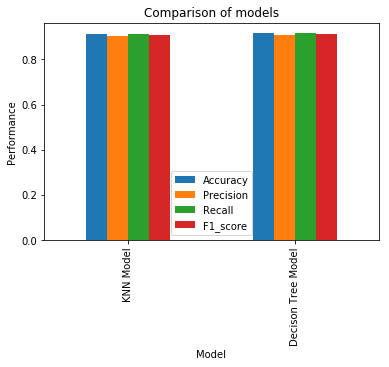

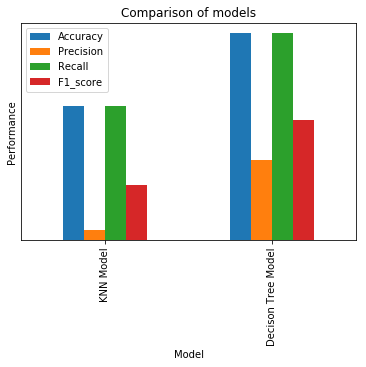

In [7]:
#Task 3.3: Comparing the models with graphical visualisations
data = [['KNN Model', accuracy_K1, precision_K1, recall_K1, F1_score_K1], ['Decison Tree Model', accuracy_D1, precision_D1, recall_D1, F1_score_D1]]
dfm = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1_score' ])
print(dfm)

dfm.plot( kind='bar',x= 'Model', y=['Accuracy', 'Precision', 'Recall', 'F1_score'], title='Comparison of models')
#plt.yscale('log')
#plt.ylim(0,1)

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance")

#Show plot
plt.show()

dfm.plot( kind='bar',x= 'Model', y=['Accuracy', 'Precision', 'Recall', 'F1_score'], title='Comparison of models')

#Logarithmic conversion of y axis scale
plt.yscale('log')

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance")

#Show plot
plt.show()
